In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [19]:
kx = 1
ky = 1
kz = 1
def give_exp(point, ks):
    return exp(I*(ks[0]*point[0] + ks[1]*point[1] + ks[2]*point[2]))

In [37]:
a = 1
b = 1
kxs = np.linspace(-10,10,100)
kys = np.linspace(-10,10,100)
kzs = np.linspace(-10,10,100)

ks = np.array([kxs,kys,kzs])

In [46]:
ks.shape

(3, 100)

In [47]:
a = 1
b = 1
points = [
    (0,a,0), ((3**0.5/2)*a,-a/2,0), (-(3**0.5/2)*a,-a,0),
    (0,0,b), (0,a, b), ((3**0.5/2)*a,-a/2,b), (-(3**0.5/2)*a,-a, b)
]
sum = 0
energies = []
for i in range(ks.shape[1]): 
    for point in points:
        sum += give_exp(points[0], ks[:, i])
    sum_c = np.conjugate(sum)
    energy = (sum*sum_c).evalf()
    energies.append(energy)

In [77]:
energies_1 = energies.astype(np.float64)**0.5

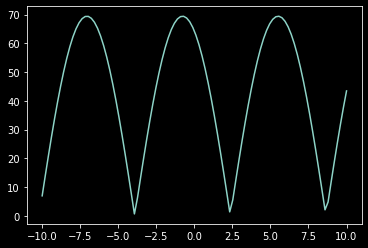

In [78]:
plt.plot(kxs, energies_1)

In [79]:
Z = energies_1.reshape(-1, 100)

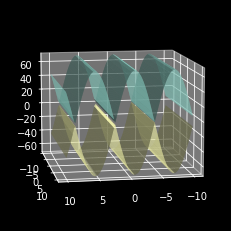

In [91]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x, y = np.meshgrid(kxs, kys)

surf = ax.plot_surface(x, y, Z)
surf2 = ax.plot_surface(x, y, -Z)
ax.view_init(elev=10, azim=80)

In [87]:
a = 1
b = 1
points = [
    (0,a,0), ((3**0.5/2)*a,-a/2,0), (-(3**0.5/2)*a,-a,0),
    (0,0,b), (0,a, b), ((3**0.5/2)*a,-a/2,b), (-(3**0.5/2)*a,-a, b)
]
sum = 0
energies = []
for i in range(ks.shape[1]): 
    for point in points:
        sum += give_exp(points[0], ks[:, i])
    # sum_c = np.conjugate(sum)
    # energy = (sum*sum_c).evalf()
    energies.append(sum)

In [2]:
a=1
def give_energy(kx, ky):
    t1 =4*np.cos(a*ky)
    t2 = 8*np.cos(3**0.5*a*kx/2)*np.cos(a*ky/2)
    t3 = 16*np.cos(3**0.5*a*kx/2)*np.cos(3*a*ky/2)
    t4 = 16*(np.cos(3**0.5*a*kx/2))**2
    return (5+t1+t2+t3+t4)**0.5

give_energy = np.vectorize(give_energy)

In [5]:
give_energy(0,0)

7.0

In [4]:
kxs = np.linspace(-4,4,100)
kys = np.linspace(-4,4,100)
# energies= np.zeros(len(kxs))
# for i in range(len(kxs)):
#     energies[i] = give_energy(kxs[i], kys[i])

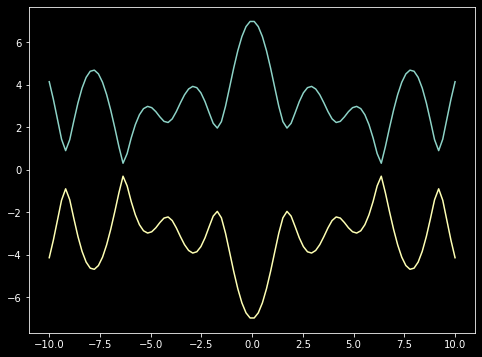

In [19]:
plt.figure(figsize = (8,6))
plt.plot(kys, energies)
plt.plot(kys, -energies)

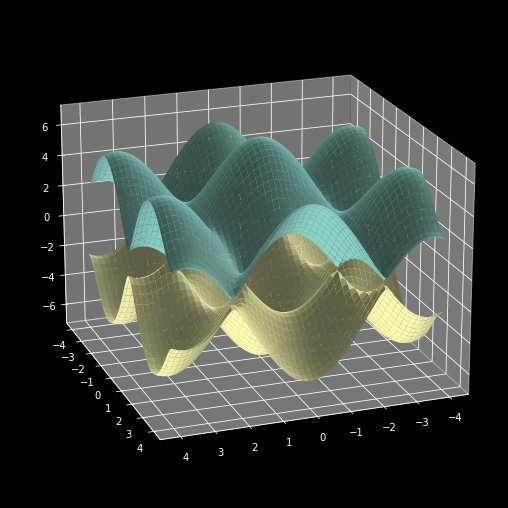

In [5]:
fig1=plt.figure(figsize=(30,20))  
ax11=fig1.add_subplot(211,projection='3d')

x, y = np.meshgrid(kxs, kys)
Z = give_energy(x, y)
Z = Z.astype(np.float64)
surf = ax11.plot_surface(x, y, Z)
surf2 = ax11.plot_surface(x, y, -Z)
ax11.view_init(elev=20, azim=70)
# ax11.axis('off');

In [7]:
Z

array([[2.31624673, 2.39472676, 2.4544952 , ..., 2.4544952 , 2.39472676,
        2.31624673],
       [2.33827293, 2.41750195, 2.47780812, ..., 2.47780812, 2.41750195,
        2.33827293],
       [2.40596616, 2.485303  , 2.54568659, ..., 2.54568659, 2.485303  ,
        2.40596616],
       ...,
       [2.40596616, 2.485303  , 2.54568659, ..., 2.54568659, 2.485303  ,
        2.40596616],
       [2.33827293, 2.41750195, 2.47780812, ..., 2.47780812, 2.41750195,
        2.33827293],
       [2.31624673, 2.39472676, 2.4544952 , ..., 2.4544952 , 2.39472676,
        2.31624673]])

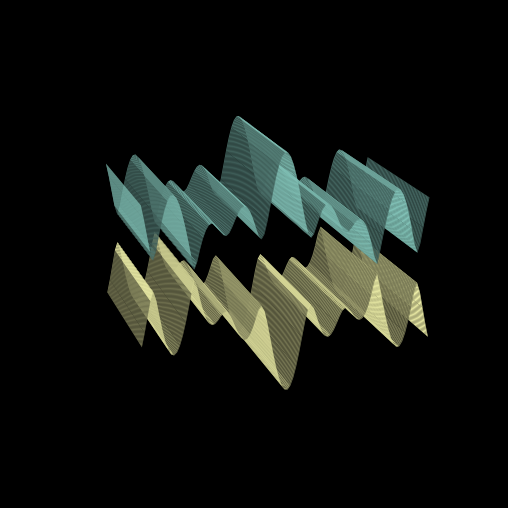

In [21]:
fig1=plt.figure(figsize=(30,20))  
ax11=fig1.add_subplot(211,projection='3d')

x, y = np.meshgrid(kxs, kys)
Z = energies.reshape(-1, 100)
surf = ax11.plot_surface(x, y, Z)
surf2 = ax11.plot_surface(x, y, -Z)
ax11.view_init(elev=10, azim=80)
ax11.axis('off');

In [28]:
def give_energy(kx, ky):
    t1 = 4*np.cos(3/2*a*kx)*cos(3**0.5*a*ky/2)
    t2 =  4*(np.cos(3**0.5*a*ky/2))**2
    return (1+t1+t2)**0.5
give_energy = np.vectorize(give_energy)

In [29]:
kxs = np.linspace(-3,3,100)
kys = np.linspace(-3,3,100)
# energies= np.zeros(len(kxs))
# for i in range(len(kxs)):
#     energies[i] = give_energy(kxs[i], kys[i])

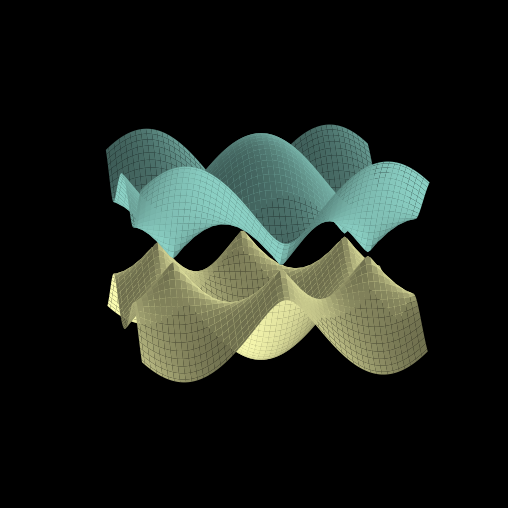

In [33]:
fig1=plt.figure(figsize=(30,20))  
ax11=fig1.add_subplot(211,projection='3d')

x, y = np.meshgrid(kxs, kys)
Z = give_energy(x, y)
Z = Z.astype(np.float64)
surf = ax11.plot_surface(x, y, Z)
surf2 = ax11.plot_surface(x, y, -Z)
ax11.view_init(elev=10, azim=80)
ax11.axis('off');

In [46]:
def give_energy(kx, ky, kz):
    t1 = 4*(np.cos(kz*b/2))**2
    t2 = 4*(np.cos(3**0.5*kx*a/2))**2
    t3 = 4*np.cos(3**0.5*kx*a/2)*(np.cos(3*ky*a/2))+1
    t4 = 4*np.cos(3**0.5*kx*a/2)
    t5 = np.cos((ky*b/2+kz*b)) + np.cos(ky*a/2)
    t6 = 2*np.cos(ky*a-kz*b)
    return (t1*(t2+t3) + t4*t5 +t6 + 1)**2
give_energy = np.vectorize(give_energy)

In [47]:
kxs = np.linspace(-4,4,100)
kys = np.linspace(-4,4,100)
kzs = np.linspace(-4,4,100)

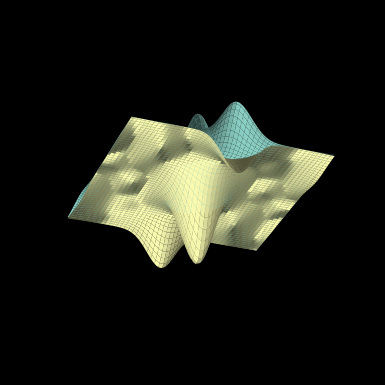

In [51]:
b =1
a = 1
fig=plt.figure(figsize=(20,15))  
ax=fig.add_subplot(211,projection='3d')

x, y = np.meshgrid(kxs, kys)
Z = give_energy(x, y, kzs)
Z = Z.astype(np.float64)
surf = ax.plot_surface(x, y, Z)
surf2 = ax.plot_surface(x, y, -Z)
ax.view_init(elev=-30, azim=70)
ax.axis('off');

In [9]:
import plotly.graph_objects as go

In [11]:
go.Figure(data = [go.Surface(x=x, y=y, z=Z),
    go.Surface(x=x, y=y, z=-Z)])    

In [13]:
Z.max()-(Z.min())

6.931466708868343